<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/Mid_term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, auc, root_mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

Mounted at /content/drive


Зробити змінну чи  був попередній контакт 1/0;
Змінна спроба попереднього контакту, виходячи зі змінної poutcome - failure success -1, nonexistent - 0; campaign можна почистити від викидів (попередньо більше 20); змінна з фейловою попередньою кампанією; створити колонку, яка буде позначати клієнтів, у яких не було контакту (pdays=999) та на яких зафейлилась попередня кампанія (всі інші 0)

In [2]:
train=pd.read_csv('drive/MyDrive/ML_course/bank-additional-full.csv', sep=";")

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
train['prev_contact']=np.where(train['pdays']==999, 'yes', 'no')

In [6]:
train['prev_campaign']=np.where((train['poutcome']=='failure')|(train['poutcome']=='success'), 'yes', 'no')

In [7]:
train['prev_fail_no_contact']=np.where((train['poutcome']=='failure')&(train['pdays']==999), 'yes', 'no')

In [8]:
train=train[train['campaign']<=20]

In [19]:
train['y']=np.where(train['y']=='yes',1,0)

In [20]:
cols=list(train.columns)
cols.remove('y')
cols.append('y')
train=train[cols]

In [21]:
X=train.drop('duration', axis=1).iloc[:, :-1]
y=train.y

# Графіки розподілу

In [159]:
train[train['age']>69].shape

(469, 24)

In [157]:
px.box(train['age'])

In [160]:
age=train.groupby(['age'])[['age','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(age, x='age', y='proportion', color='y', barmode='group', histfunc='avg')
fig.update_layout(width=600, height=300)

In [154]:
housing=train.groupby(['housing'])[['housing','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(housing, x='housing', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['housing'].nunique()*2)
fig.update_layout(width=600, height=300)

In [155]:
loan=train.groupby(['loan'])[['loan','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(loan, x='loan', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['loan'].nunique()*2)
fig.update_layout(width=600, height=300)

In [13]:
px.box(train['previous'])

In [151]:
previous=train.groupby(['previous'])[['previous','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(previous, x='previous', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['previous'].nunique()*2)
fig.update_layout(width=900, height=450)

In [15]:
px.box(train['campaign'])

In [150]:
campaign=train.groupby(['campaign'])[['campaign','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(campaign, x='campaign', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['campaign'].nunique()*2)
fig.update_layout(width=900, height=450)

In [118]:
px.box(train[train['pdays']<999]['pdays'])

In [148]:
pdays=train[train['pdays']<999].groupby(['pdays'])[['pdays','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(pdays, x='pdays', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train[train['pdays']<999]['pdays'].nunique()*2)
fig.update_layout(width=900, height=450)

In [162]:
default=train.groupby(['default'])[['default','y']].value_counts(normalize=True).reset_index()
fig=px.histogram(default, x='default', y='proportion', color='y', barmode='group', histfunc='avg', nbins=train['default'].nunique()*2)
fig.update_layout(width=900, height=450)

# Моделі

In [22]:
input_cols=X.columns.to_list()
target_col=train.iloc[:,-1].name

In [23]:
numeric_cols=X.select_dtypes(exclude='object').columns.tolist()
categorical_cols=X.select_dtypes(include='object').columns.tolist()

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
ordinal_col=['education']
categorical_cols.remove('education')

In [26]:
categories=['unknown','illiterate','basic.4y', 'high.school', 'basic.6y',
                                                         'basic.9y','professional.course', 'university.degree']

## Логістична регресія

In [27]:
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])
one_hot_enc=Pipeline(steps=[('onehot', OneHotEncoder())])
ordinal_enc=Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[categories]))])

preprocessor=ColumnTransformer(transformers=[
                                            ('onehot', one_hot_enc, categorical_cols),
                                            ('ordinal', ordinal_enc, ordinal_col),
                                            ('scaler', numeric_transformer, numeric_cols)
],remainder='passthrough')

model_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='liblinear',  penalty='l1', class_weight={1:8, 0:1}))])

In [28]:
model_pipeline.fit(X_train, y_train)
pred=model_pipeline.predict(X_train)
pred_proba=model_pipeline.predict_proba(X_train)[:,1]
fpr, tpr, thresholds=roc_curve(y_train, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
confusion_matrix(y_train, pred)
f1_score(y_train, pred)
print(classification_report(y_train, pred))

0.79362239941055
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29113
           1       0.35      0.62      0.45      3711

    accuracy                           0.83     32824
   macro avg       0.65      0.74      0.67     32824
weighted avg       0.88      0.83      0.85     32824



In [29]:
model_pipeline.named_steps['classifier']

LogisticRegression(class_weight={0: 1, 1: 8}, penalty='l1', solver='liblinear')

In [30]:
pred=model_pipeline.predict(X_test)
pred_proba_test=model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba_test)
roc_auc=auc(fpr, tpr)
print(roc_auc)
confusion_matrix(y_test, pred)
f1_score(y_test, pred)
print(classification_report(y_test, pred))

0.8029864045601186
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7279
           1       0.36      0.64      0.47       928

    accuracy                           0.83      8207
   macro avg       0.66      0.75      0.68      8207
weighted avg       0.88      0.83      0.85      8207



In [31]:
confusion_matrix(y_test, pred)

array([[6234, 1045],
       [ 330,  598]])

In [32]:
px.histogram(pred_proba)

In [33]:
features_importance=pd.DataFrame(preprocessor.get_feature_names_out(), [float(value) for value in np.round(model_pipeline.named_steps['classifier'].coef_[0],4)],
                                 columns=['feature'] ).reset_index().sort_values(by=['index','feature'], ascending=False)

In [34]:
features_importance.head(40)


,index,feature
32,1.3471,onehot__month_mar
57,1.1253,scaler__cons.price.idx
59,0.5148,scaler__euribor3m
28,0.4303,onehot__month_aug
60,0.3709,scaler__nr.employed
29,0.3670,onehot__month_dec
44,0.3448,onehot__poutcome_success
5,0.2767,onehot__job_retired
8,0.2766,onehot__job_student
41,0.1477,onehot__day_of_week_wed


## Логістична регресія зі SMOTENC

In [36]:
num_cols_processed=['scaler__'+i for i in numeric_cols]

In [37]:
features=[i for i in preprocessor.get_feature_names_out().tolist() if i not in num_cols_processed]

In [38]:
X_train_smenc=pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_smenc=pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [39]:
smenc=SMOTENC(random_state=42, categorical_features=features)
X_train_smenc, y_train_smenc=smenc.fit_resample(X_train_smenc, y_train)

In [40]:
logreg=LogisticRegression(solver='saga',  penalty='l2')
logreg.fit(X_train_smenc, y_train_smenc)
pred=logreg.predict(X_train_smenc)
pred_proba=logreg.predict_proba(X_train_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_train_smenc, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
confusion_matrix(y_train_smenc, pred)
f1_score(y_train_smenc, pred)
print(classification_report(y_train_smenc, pred))

0.8970986945336457
              precision    recall  f1-score   support

           0       0.78      0.90      0.84     29113
           1       0.88      0.75      0.81     29113

    accuracy                           0.82     58226
   macro avg       0.83      0.82      0.82     58226
weighted avg       0.83      0.82      0.82     58226



In [41]:
pred=logreg.predict(X_test_smenc)
pred_proba=logreg.predict_proba(X_test_smenc)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, pred_proba)
roc_auc=auc(fpr, tpr)
print(roc_auc)
confusion_matrix(y_test, pred)
f1_score(y_test, pred)
print(classification_report(y_test, pred))

0.7785422667238301
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7279
           1       0.40      0.53      0.45       928

    accuracy                           0.86      8207
   macro avg       0.67      0.71      0.68      8207
weighted avg       0.88      0.86      0.86      8207



In [42]:
logreg_list=pd.DataFrame(list(zip(preprocessor.get_feature_names_out().tolist(), [float(value) for value in np.round(logreg.coef_[0],4)])),
                         columns=['features', 'importance']).sort_values(by='importance', ascending=False)

In [43]:
logreg_list.head(40)

,features,importance
46,onehot__prev_contact_yes,3.0790
25,onehot__contact_cellular,2.4001
16,onehot__default_no,2.0414
48,onehot__prev_campaign_yes,1.9115
49,onehot__prev_fail_no_contact_no,1.7162
50,onehot__prev_fail_no_contact_yes,1.6371
44,onehot__poutcome_success,1.6294
43,onehot__poutcome_nonexistent,1.4419
47,onehot__prev_campaign_no,1.4419
17,onehot__default_unknown,1.3777


## KNN

In [44]:
X_train_transf=preprocessor.fit_transform(X_train)
X_test_transf=preprocessor.transform(X_test)

In [45]:
def search_model(search):
  model_search=search
  model_search.fit(X_train_transf, y_train)
  best_model=model_search.best_estimator_
  print(f'best params: {model_search.best_params_} \nbest score: {model_search.best_score_}')
  return best_model

In [46]:
X_test_transf.shape

(8207, 61)

In [47]:
def predictions(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred_train=model.predict(X_train)
  pred_val=model.predict(X_test)
  pred_proba_train=model.predict_proba(X_train)[:,1]
  pred_proba_val=model.predict_proba(X_test)[:,1]
  fpr_tr, tpr_tr, threshold_tr=roc_curve(y_train, pred_proba_train)
  fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba_val)
  roc_auc_tr=auc(fpr_tr, tpr_tr)
  roc_auc_val=auc(fpr_val, tpr_val)
  print(f'roc auc train: {roc_auc_tr} \nroc auc val: {roc_auc_val}')
  return model

In [48]:
predictions(KNeighborsClassifier(),X_train_smenc, X_test_smenc, y_train_smenc, y_test)

roc auc train: 0.9836181443069295 
roc auc val: 0.7305139578428261


KNeighborsClassifier()

In [49]:
params_knn = {'n_neighbors': np.arange(1,10)}

In [50]:
knn_best=predictions(search_model(GridSearchCV(estimator=KNeighborsClassifier(),
                                      param_grid=params_knn,
                                      cv=5,
                                      scoring='f1')), X_train_smenc, X_test_smenc, y_train_smenc, y_test)

best params: {'n_neighbors': np.int64(9)} 
best score: 0.3714667273859879
roc auc train: 0.9698054071537106 
roc auc val: 0.7413116558735331


## Tree

In [51]:
parameters_tree={'max_depth': np.arange(1,20,1), 'max_leaf_nodes': np.arange(2,10,1) }

In [52]:
dt_best=predictions(search_model(GridSearchCV(DecisionTreeClassifier(random_state=42),
                                      param_grid=parameters_tree,
                                      cv=5,
                                      scoring='roc_auc'
                                      )), X_train_smenc, X_test_smenc, y_train_smenc, y_test)

best params: {'max_depth': np.int64(4), 'max_leaf_nodes': np.int64(9)} 
best score: 0.7526865368068822
roc auc train: 0.7934148064740845 
roc auc val: 0.7731022254620046


In [53]:
tree_feat_import=pd.DataFrame(list(zip(preprocessor.get_feature_names_out().tolist(), [float(value) for value in np.round(dt_best.feature_importances_,4)])),
                         columns=['features', 'importance']).sort_values(by='importance', ascending=False)

In [54]:
tree_feat_import.head(10)

,features,importance
60,scaler__nr.employed,0.6638
58,scaler__cons.conf.idx,0.1565
25,onehot__contact_cellular,0.0711
59,scaler__euribor3m,0.0516
35,onehot__month_oct,0.0298
53,scaler__campaign,0.0272
5,onehot__job_retired,0.0000
7,onehot__job_services,0.0000
6,onehot__job_self-employed,0.0000
1,onehot__job_blue-collar,0.0000


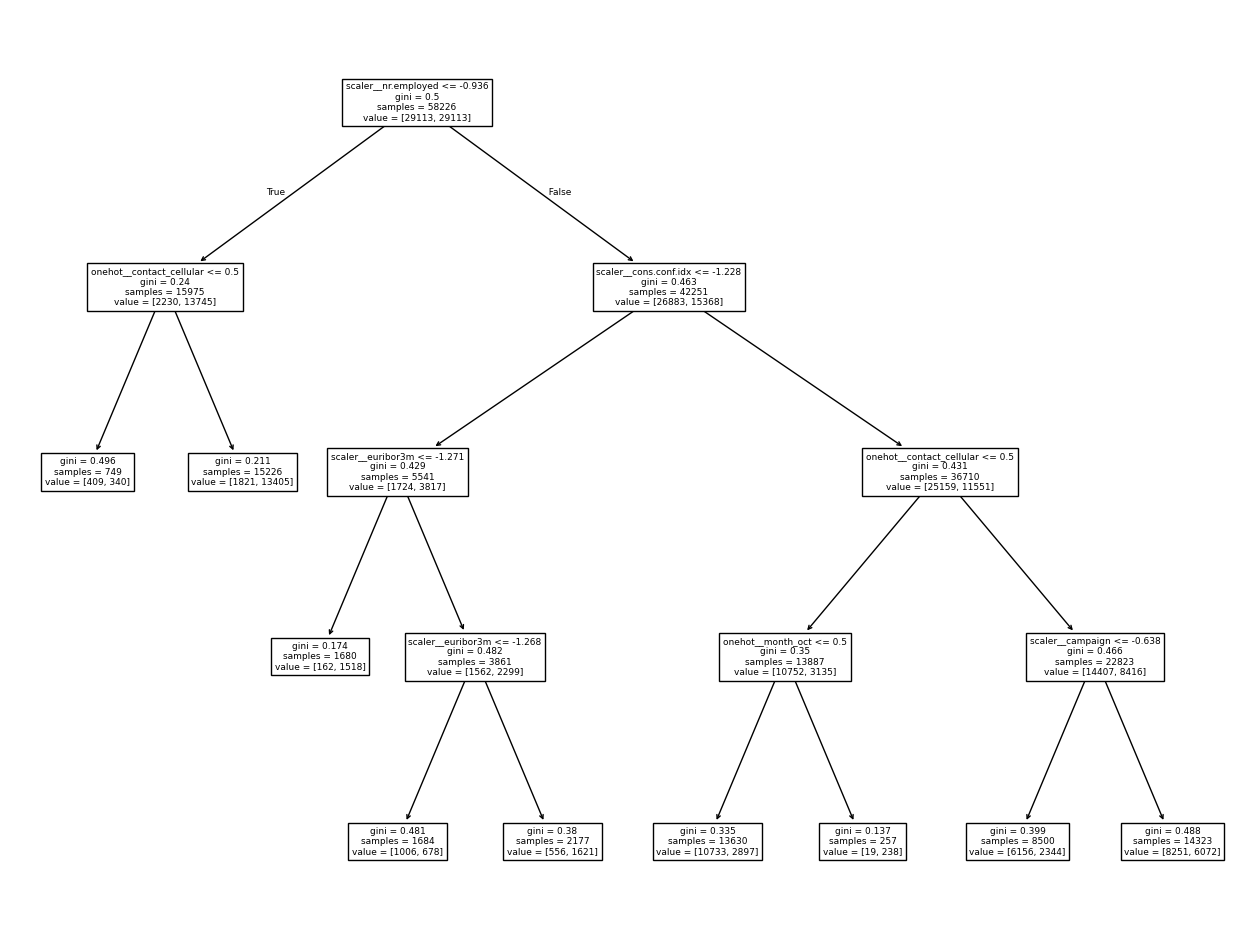

In [55]:
plt.figure(figsize=(16,12))
plot_tree(dt_best, feature_names=preprocessor.get_feature_names_out());

## Light GBM

In [56]:
categorical_cols=X_train.select_dtypes(include='object').columns.tolist()

In [57]:
X_train[categorical_cols]=X_train[categorical_cols].astype('category')
X_test[categorical_cols]=X_test[categorical_cols].astype('category')

In [69]:
cats=X_train.select_dtypes(include='category').columns.tolist()

In [71]:
smenc=SMOTENC(random_state=42, categorical_features=cats)
X_tr_smenc, y_tr_smenc=smenc.fit_resample(X_train, y_train)

In [72]:
def objective(params):
    clf = lgb.LGBMClassifier(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        num_leaves=int(params['num_leaves']),
        min_child_weight=params['min_child_weight'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        min_split_gain=params['min_split_gain'],
        cat_feature=cats,
        scale_pos_weight=params['scale_pos_weight']
    )

    clf.fit(X_tr_smenc, y_tr_smenc, eval_set=[(X_test, y_test)])
    pred = clf.predict(X_test)
    pred_proba=clf.predict_proba(X_test)[:,1]
    fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba)
    roc_auc=auc(fpr_val, tpr_val)

    return {'loss': -roc_auc, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 200, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'min_split_gain': hp.uniform('min_split_gain', 0, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 0.1, 10)}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['num_leaves'] = int(best['num_leaves'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

final_lgb_clf = lgb.LGBMClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    num_leaves=best['num_leaves'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    min_split_gain=best['min_split_gain'],
    cat_feature=cats,
    missing=np.nan,
    scale_pos_weight=best['scale_pos_weight']
)

final_lgb_clf.fit(X_tr_smenc, y_tr_smenc, eval_set=[(X_test, y_test)])
final_pred = final_lgb_clf.predict(X_test)
pred_proba=final_lgb_clf.predict_proba(X_test)[:,1]
fpr_val, tpr_val, threshold_val=roc_curve(y_test, pred_proba)
roc_auc_final=auc(fpr_val, tpr_val)

print("Точність на валідаційній вибірці: {:.4f}".format(roc_auc_final))

print(classification_report(y_test, final_pred, digits=4))


[LightGBM] [Warning] categorical_feature is set with cat_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,prev_contact,prev_campaign,prev_fail_no_contact, categorical_column=1,2,3,4,5,6,7,8,9,13,19,20,21 will be ignored. Current value: categorical_feature=job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,prev_contact,prev_campaign,prev_fail_no_contact
[LightGBM] [Info] Number of positive: 29113, number of negative: 29113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 58226, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

# Other

In [ ]:
a=train[train['pdays']<999]

In [74]:
px.box(train['previous'])

In [78]:
train.select_dtypes(include='object').iloc[:,:-1].columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'prev_contact', 'prev_campaign'],
      dtype='object')

In [81]:
def custom_subplots():
  dataset=train.select_dtypes(include='category')
  fig=make_subplots(rows=5, cols=2, subplot_titles=dataset.iloc[:,:-1].columns)
  a=0
  for j in dataset.iloc[:,:-1].columns:
    a+=1
    subset=dataset.groupby([j])[[j,'y']].value_counts(normalize=True).reset_index()
    for y_val in subset['y'].unique():
      sub_c = subset[subset['y'] == y_val]
      fig.add_trace(go.Bar(x=sub_c[j], y=sub_c['proportion'], name=y_val), row=(a+1)//2, col=(a%2)+1)
  fig.update_layout(barmode='group', width=1000, height=1500)
  return fig.show()

In [ ]:
frame=pd.DataFrame(columns=['value', 'proportion'])
def proportions(frame):
  for i in train.iloc[:,:-1].select_dtypes(include='object').columns:
    counts=pd.DataFrame(columns=['value', 'proportion'])
    counts['feature']=pd.Series([i]*train[i].nunique())
    counts['value']=train[i].value_counts(normalize=True).reset_index().iloc[:,0]
    counts['proportion']=train[i].value_counts(normalize=True).reset_index().iloc[:,1]
    frame=pd.concat([frame,counts], axis=0)
  return pd.DataFrame(frame)

<Axes: >

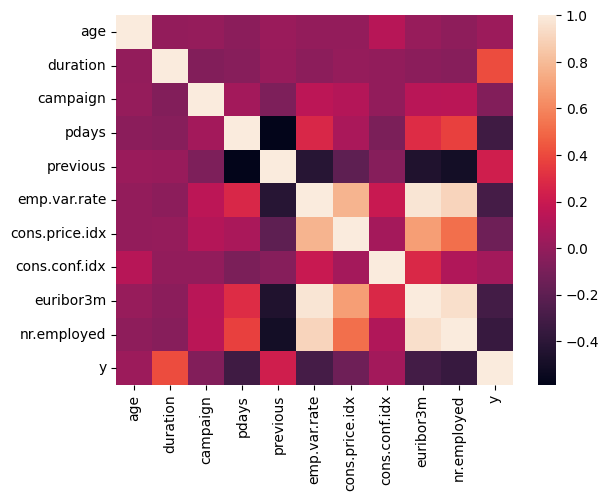

In [85]:
sns.heatmap(train.select_dtypes(exclude='object').corr())